In [1]:
import networkx as nx 
from networkx.drawing.nx_agraph import write_dot, graphviz_layout #TODO
import matplotlib.pyplot as plt 

In [2]:
words = ["bbbd", "aabbabd", "ababcd", "abcbccd"]


In [3]:
def check_last(word):
    for a in word[ : len(word) - 1]:
        if a == word[-1]:
            return False
    return True

print([check_last(w) for w in words])

[True, True, True, True]


In [4]:
class Trie_node:
    def __init__(self, letter = None, parent = None, link = None, depth = 0):
        self.children = dict()
        self.parent = parent
        
        self.letter = letter
        self.depth = depth 
        
        self.link = link

In [118]:
class Trie_tree:
    def __init__(self):
        self.root = Trie_node(letter = "")
    
    def validate(self, text):
        last = "$"
        return text if text[-1] == last else text + last
    
    def add(self, word):
        word = self.validate(word)
        
        for i in range(len(word)):
            node = self.root
        
            for a in word[i:]:
                if a not in node.children:
                    node.children[a] = Trie_node(letter = a, parent = node, depth = node.depth + 1)

                node = node.children[a]    
                
            self.up_link(node)
            
    def up_link(self, node):
        pass
    
    
    def find(self, word):
        node = self.root
        
        for c in word:
            if c not in node.children:
                return False
            node = node.children[c]
        return True
    

In [119]:
trie = Trie_tree()

# for w in words[:]:
#     trie.add(w)
trie.add("abaaba$")
# trie.print()


In [128]:
class Suffix_node:
    def __init__(self, letter = None, parent = None, link = None, depth = 0, suffixStart = -1):
        self.children = dict()
        self.parent = parent
        
        self.suffixStart = suffixStart
        self.letter = letter
        self.depth = depth 
        
        self.link = link

In [147]:
class Suffix_tree:
    def __init__(self):
        self.root = Suffix_node(letter = "")
    
    def validate(self, text):
        last = "$"
        return text if text[-1] == last else text + last
    
    def add(self, word):
        word = self.validate(word)
        
        
        for i in range(len(word)):
            node = self.root
            prefix_len = 0
            
#             j = i
#             for a in word[i:]:
            print(node)
            if prefix_len == node.depth and word[i + prefix_len] in node.children:
#                     node.children[a] = Trie_node(letter = a, parent = node, depth = node.depth + 1)
                node, prefix_len = self.slowFind(word, i, node, prefix_len)

            if node.depth > prefix_len:
                node = self.splitNode(word, node, prefix_len)
            
#                 node = node.children[a]  
            self.createLeaf(word, i, node, prefix_len)
                
#             self.up_link(node)
            
    def slowFind(self, text, i, node, prefix_len):
        while prefix_len == node.depth and text[i + prefix_len] in node.children:
            node = node.children[text[i + prefix_len]]
            prefix_len += 1
            while prefix_len < node.depth and text[i + prefix_len] == text[node.suffixStart + prefix_len]:
                prefix_len += 1
        return node, prefix_len
    
    def splitNode(self, text, node, prefix_len):
        parent = node.parent
        
        newNode = Suffix_node(suffixStart=node.suffixStart, depth = prefix_len,
                             letter = text[node.suffixStart + parent.depth], parent = parent)
        
        parent.children[newNode.letter] = newNode
        node.parent = newNode
        node.letter = text[node.suffixStart + prefix_len]
        newNode.children[node.letter] = node
        
        return newNode
    
    def createLeaf(self, text, suffixStart, node, prefix_len):
        print("creating leaf", node)
        leaf = Suffix_node(suffixStart=suffixStart, depth = len(text) - suffixStart,
                          letter = text[suffixStart + prefix_len])
        leaf.parent = node
        node.children[leaf.letter] = leaf
        return leaf
    
    
    
    def up_link(self, node):
        pass
    
    
    def find(self, word):
        node = self.root
        
        for c in word:
            if c not in node.children:
                return False
            node = node.children[c]
        return True
    

In [148]:
suffixTree = Suffix_tree()

# for w in words[:]:
#     trie.add(w)
suffixTree.add("abaaba$")
# trie.print()

creating leaf <__main__.Suffix_node object at 0x7f9e23a17a90>
creating leaf <__main__.Suffix_node object at 0x7f9e23a17a90>
creating leaf <__main__.Suffix_node object at 0x7f9e23a32130>
creating leaf <__main__.Suffix_node object at 0x7f9e23a32fa0>
creating leaf <__main__.Suffix_node object at 0x7f9e23a322b0>
creating leaf <__main__.Suffix_node object at 0x7f9e23a32130>
creating leaf <__main__.Suffix_node object at 0x7f9e23a17a90>


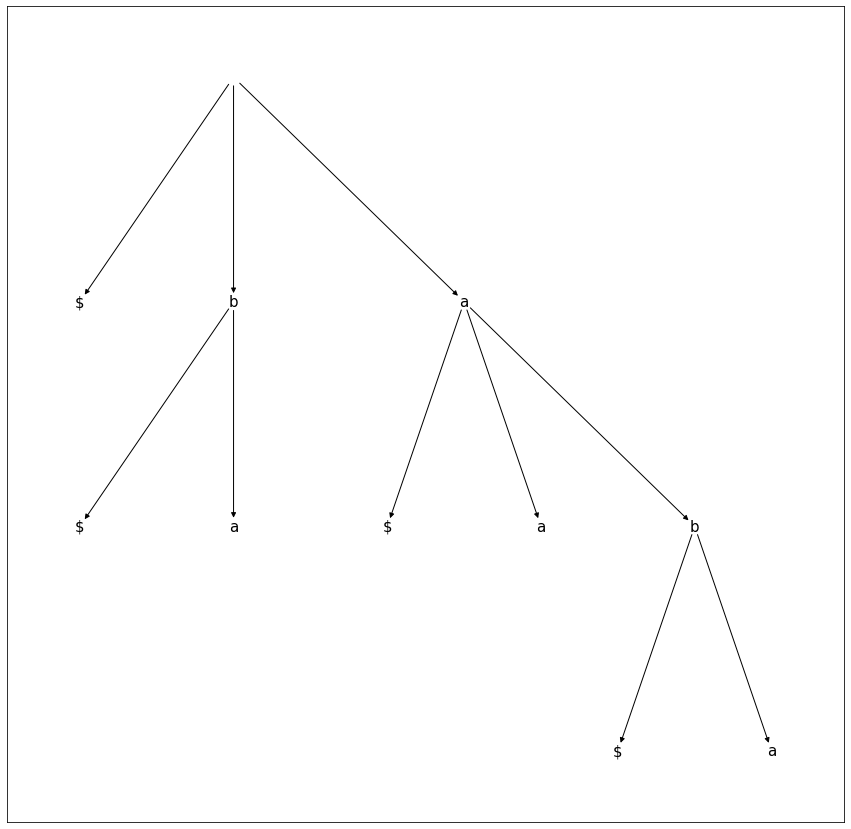

In [151]:
visualize_trie(suffixTree)

In [124]:
def visualize_trie(trie):
    plt.figure(figsize=(15,15))
    G = nx.DiGraph()

    q = []
    q.append(trie.root)
    i = 0
    while(q):
        node = q.pop()
        node.index = i
        
        G.add_node(node.index, letter = node.letter)
        
        if node.parent is not None:
            G.add_edge(node.parent.index, node.index)
        i+=1
        
        for child in node.children.values():
            q.append(child)

    pos = graphviz_layout(G, prog='dot')
    
    labels = {u : l['letter'] for u, l in G.nodes(data = True)}
    
    nx.draw_networkx_edges(G, pos, arrows=True) 
    nx.draw_networkx_labels(G, pos, labels, font_size = 15)
    
    plt.show()

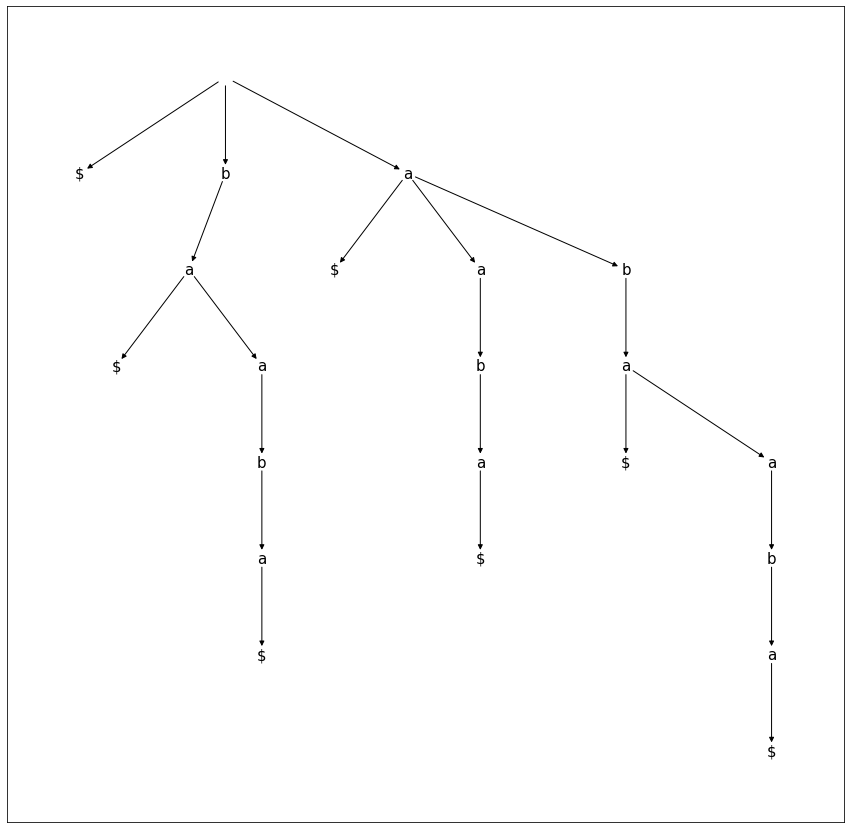

In [125]:
visualize_trie(trie)

In [123]:
trie.find("abb")

False

In [ ]:
def build_tree_schema(text):
    trie = compute_initial_trie(text)
    leaf = trie.leafs()[0]
    for i in range(1, len(text)):
        suffix = text[i:]
        head = trie.find(suffix, leaf)
        suffix_end = suffix[head.depth():]        
        leaf = head.graft(suffix_end)
    return trie

In [ ]:
from queue import LifoQueue as queue

def up_link_down(sibling):
    letters = queue()
    while(sibling and not sibling.link):
        letters.put(sibling.letter)
        sibling = sibling.parent
    if(not sibling):
        return (None, None)
    node = sibling.link
    while(current_letter == letters.get()):
        if(node.child(current_letter)):
            node = node.child(current_letter)
            sibling = sibling.child(current_letter)
            sibling.link = node
        else:
            break
    return (node, sibling)

In [ ]:
def graft(node, text, sibling=None):
    for current_letter in list(text):
        node = node.create_child(current_letter)
        if(sibling):
            sibling = sibling.child(current_letter)
            sibling.link = node
    return node

In [ ]:
def left_to_right(text):
    root = Node("")
    leaf = graft(root, text)
    root.children()[0].link = root
    for i in range(1, len(text)):
        head, sibling = up_link_down(leaf)
        if(not head):
            sibling = root.child(text[i-1])
            sibling.link = root
            head = root
        graft(head, text[i+head.depth:], sibling)

In [ ]:
build_tree_schema(pattern)